## Cleaning Dataframe

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel ("https://www.sharkattackfile.net/spreadsheets/GSAF5.xls")
df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,15 Mar 2024,2024.0,Unprovoked,AUSTRALIA,Queensland,Bargara Beach,Swimming,Brooklyn Sauer,F,13,...,Tiger shark,"Yahoo News, 3/15/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,04 Mar 2024,2024.0,Unprovoked,USA,Hawaii,"Old Man's, Waikiki",Surfing,Matthew White,M,NaN,...,Tiger shark 8',"Surfer, 3/6/2024F",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,02 Mar-2024,2024.0,Unprovoked,USA,Hawaii,"Rainbows, Oahu",Swimming,NaN,F,11,...,3' to 4' shark,"Hawaii News Now, 3/4/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25 Feb-2024,2024.0,Unprovoked,AUSTRALIA,Western Australia,"Sandlnd Island, Jurian Bay",NaN,female,F,46,...,Tiger shark,"WA Today, 2/26/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14 Feb-2024,2024.0,Unprovoked,INDIA,Maharashtra,"Vaitarna River, Palghar District",Fishing,Vicky Suresh Govari,M,32,...,"Bull shark, 7'","Times of India, 2/14/2024",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.drop(['Unnamed: 11','pdf','href formula','href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22','Source'],axis=1,inplace=True)

In [4]:
df.columns = [column.strip() for column in df.columns] 

In [5]:
df.dropna(how = "all",inplace=True) # df.shape-> befor drop:6968 rows - after drop:6943 rows

In [6]:
df.drop_duplicates(inplace=True) # df.duplicated().sum()->2 so i drop 2 rows which were the same
                                 # duplicate_rows = df[df.duplicated()] -> show duplicated rows

In [7]:
df.isnull().sum()

Date           0
Year           2
Type          18
Country       50
State        482
Location     565
Activity     586
Name         220
Sex          579
Age         2992
Injury        35
Time        3524
Species     3131
dtype: int64

In [8]:
#df[df.Year.isnull()]
#df.loc[[800,6712]]

In [9]:
df.loc[800, "Year"] = 2017 # fill nan  according to year in Date col
df.loc[6712, "Year"] = 1836

In [10]:
df.nunique()

Date        6003
Year         259
Type          12
Country      225
State        902
Location    4514
Activity    1587
Name        5683
Sex            8
Age          243
Injury      4079
Time         410
Species     1675
dtype: int64

In [11]:
df.Sex = df.Sex.map({'M':'M','F':'F',' M':'M','M ':'M','lli':None,'M x 2':'M','N':None,'.':None})

In [12]:
df.Type = df.Type.map({
    'Unprovoked':'Unprovoked',
    ' Provoked':'Provoked',
    'Provoked':'Provoked',
    'Watercraft':'Watercraft',
    'Sea Disaster':'Sea Disaster',
    'Boat':'Boat',
    'Questionable':None,
    '?':None,
    'Unconfirmed':None,
    'Unverified':None,
    'Invalid':None,
    'Under investigation':None
})

In [13]:
df.Country = df.Country.str.upper()
df.Country = df.Country.str.strip("?")
df.Country = df.Country.replace({"ST. MAARTIN":"ST MARTIN","ST. MARTIN":"ST MARTIN","TURKS AND CAICOS":"TURKS & CAICOS","COLUMBIA":"COLOMBIA"})
df.Country.fillna('unknown', inplace=True)
df.loc[df.Country.str.contains("UAE", case=False), 'Country'] = "UNITED ARAB EMIRATES"

df.Country = df.Country.str.strip()


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6942 entries, 0 to 6943
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      6942 non-null   object 
 1   Year      6940 non-null   float64
 2   Type      6346 non-null   object 
 3   Country   6942 non-null   object 
 4   State     6460 non-null   object 
 5   Location  6377 non-null   object 
 6   Activity  6356 non-null   object 
 7   Name      6722 non-null   object 
 8   Sex       6359 non-null   object 
 9   Age       3950 non-null   object 
 10  Injury    6907 non-null   object 
 11  Time      3418 non-null   object 
 12  Species   3811 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1017.3+ KB


## Hypo 1: Location & Time can influence Shark Attacks

In [15]:
# Shark attacks in different countries and month (Date)

In [16]:
df1 = df.copy()

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6942 entries, 0 to 6943
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      6942 non-null   object 
 1   Year      6940 non-null   float64
 2   Type      6346 non-null   object 
 3   Country   6942 non-null   object 
 4   State     6460 non-null   object 
 5   Location  6377 non-null   object 
 6   Activity  6356 non-null   object 
 7   Name      6722 non-null   object 
 8   Sex       6359 non-null   object 
 9   Age       3950 non-null   object 
 10  Injury    6907 non-null   object 
 11  Time      3418 non-null   object 
 12  Species   3811 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1017.3+ KB


In [18]:
df1.drop(['Year','Type','Location','Activity','Name','Sex','Age','Injury','Time','Species'],axis=1,inplace=True)

In [19]:
df1.isna().sum()

Date         0
Country      0
State      482
dtype: int64

In [20]:
df1.Country.nunique()

202

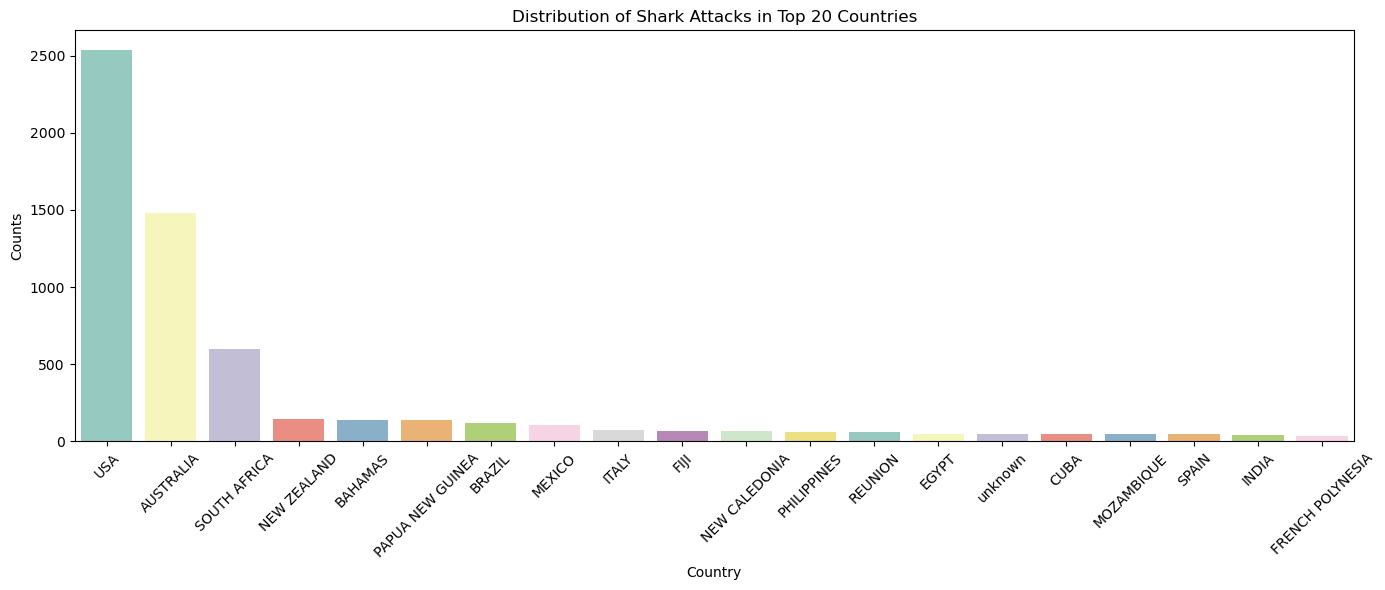

In [21]:
top_Countries = df1.Country.value_counts().head(20).index.tolist()

# Filter the DataFrame to include only the top 20 Countries
df_top = df1[df1.Country.isin(top_Countries)]

plt.figure(figsize=(14, 6))  
sns.countplot(x='Country', data=df_top, order=top_Countries, palette='Set3')

plt.title('Distribution of Shark Attacks in Top 20 Countries')
plt.xlabel('Country')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
df1['Month'] = df1['Date'] # creating a new column for "Month"

# for date inputs that have seasons, adding the middle month of the season
df1['Month'] = df1['Month'].replace({"Fall":"October","Summer":"July","summer":"July","Nox":"November","Winter":"January","2017.06.05":"June","2008.01.30":"January","02-Ap-2001":"April"},regex=True)


# removing words in "Date" that don't offer much info, anf will mess up with the r pattern later
substring = ["Early","Reported","Before","Mid","Between","date","and","Late"]
for sub in substring:
    df1['Month'] = df1['Month'].str.replace(sub, '')
    
df1['Month'] = df1['Month'].str.extract(r'([A-Za-z]{3})')

df1['Month'].isna().sum() # these NaN values, are mostly dates that had only year ( df.loc[df['Month'].isna()] )

# replacing the values are not months (checked) with NaN values
df1['Month'] = df1['Month'].replace({"sam":None,"Las":None,"Cir":None,"Pri":None,"Aft":None,"lat":None,},regex=True)
#df1['Month'].value_counts() # July and August are the most active months

df1.dropna(subset = "Month",inplace=True) # dropping NaN values, around 100+

In [23]:
usa_df = df1[df1['Country'] == 'USA']
#usa_df.isna().sum() -> 5 states have not value
usa_df = usa_df.dropna(subset=["State"])

In [24]:
#usa_df.State.value_counts()

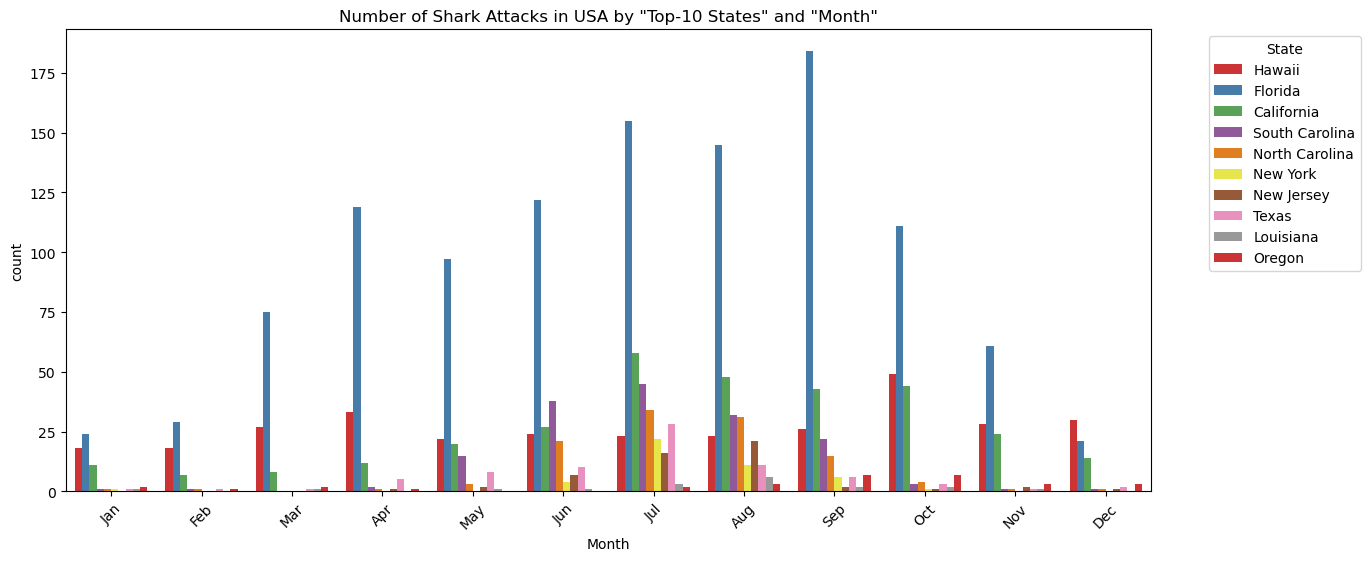

In [25]:
top_states_usa = usa_df['State'].value_counts().head(10).index # Extracting the top 15 states by shark attack frequency in USA
# Filtering data for the top 15 states in USA
filtered_usa_df = usa_df[usa_df['State'].isin(top_states_usa)]
# Visualizing the number of shark attacks in USA by state
plt.figure(figsize=(14, 6))
sns.countplot(x='Month', hue='State', data=filtered_usa_df, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],palette='Set1')
plt.title('Number of Shark Attacks in USA by "Top-10 States" and "Month"')
plt.xticks(rotation=45)
plt.legend(title='State', loc='upper right', bbox_to_anchor=(1.2, 1))

In [26]:
australia_df = df1[df1['Country'] == 'AUSTRALIA']
#australia_df.isna().sum() -> 9 states have non values
australia_df = australia_df.dropna(subset=["State"])

In [27]:
australia_df.State.value_counts()

State
New South Wales                         503
Queensland                              335
Western Australia                       224
South Australia                         107
Victoria                                 94
Torres Strait                            64
Tasmania                                 40
Northern Territory                       23
Westerm Australia                         5
Northern Territory                        4
Torres Strait                             2
Western  Australia                        1
New South ales                            1
New South Wales                           1
New  South Wales                          1
Territory of Cocos (Keeling) Islands      1
Victoria                                  1
Queensland                                1
Norfolk Island                            1
Name: count, dtype: int64

In [28]:
australia_df.State = australia_df.State.str.strip()
australia_df = australia_df.replace({"Westerm Australia":"Western Australia","New  South Wales":"New South Wales","New South ales":"New South Wales","Western  Australia":"Western Australia"})

In [29]:
australia_df.State.value_counts()

State
New South Wales                         506
Queensland                              336
Western Australia                       230
South Australia                         107
Victoria                                 95
Torres Strait                            66
Tasmania                                 40
Northern Territory                       27
Territory of Cocos (Keeling) Islands      1
Norfolk Island                            1
Name: count, dtype: int64

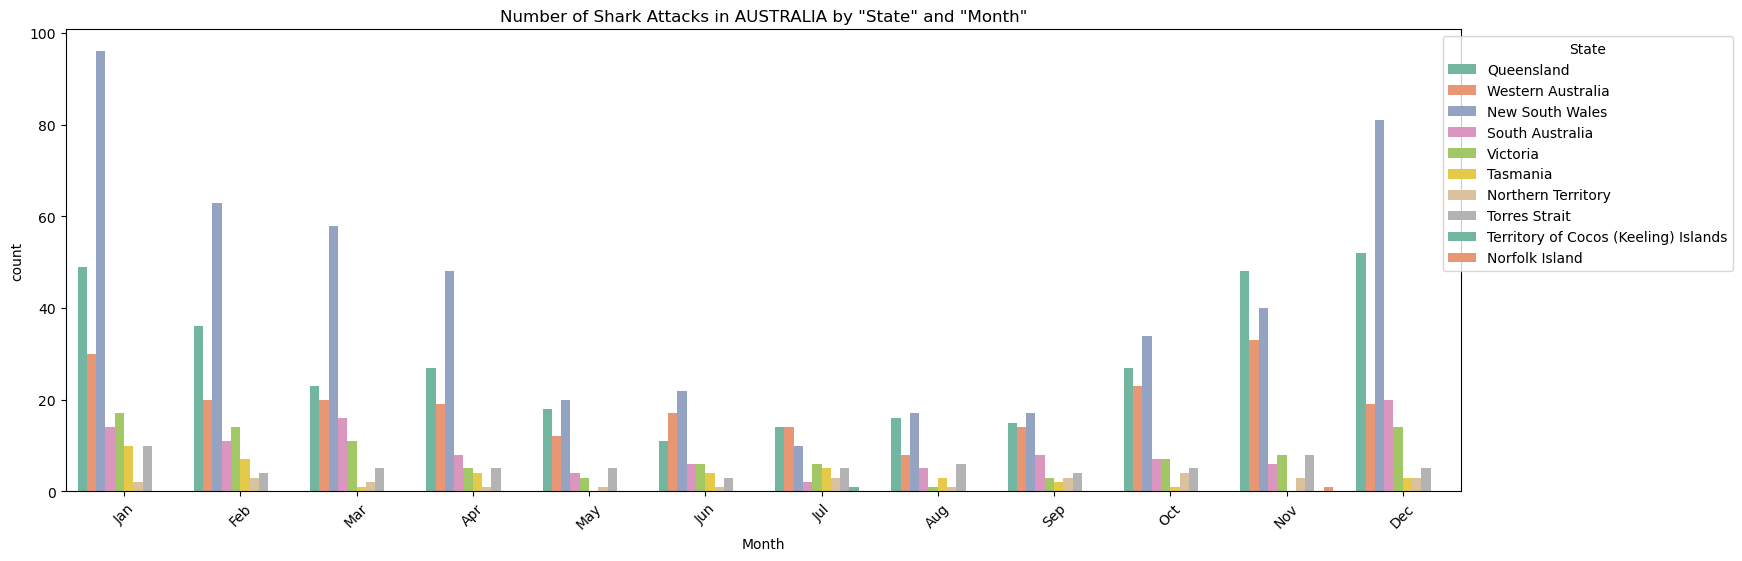

In [30]:
top_states_australia = australia_df['State'].value_counts().index
filtered_australia_df = australia_df[australia_df['State'].isin(top_states_australia)]

plt.figure(figsize=(18, 6))
sns.countplot(x='Month', hue='State', data=filtered_australia_df, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],palette='Set2')
plt.title('Number of Shark Attacks in AUSTRALIA by "State" and "Month"')
plt.xticks(rotation=45)
plt.legend(title='State', loc='upper right', bbox_to_anchor=(1.2, 1))

In [31]:
south_africa_df = df1[df1['Country'] == 'SOUTH AFRICA']
#south_africa_df.isna().sum() -> 4 states have non values
south_africa_df = south_africa_df.dropna(subset=["State"])

In [32]:
south_africa_df = south_africa_df.replace({"Easten Cape Province":"Eastern Cape Province","KNZ":"KwaZulu-Natal","KZN":"KwaZulu-Natal","Western Province":"Western Cape Province","Eastern Province":"Eastern Cape Province","Eastern Cape  Province":"Eastern Cape Province","KwaZulu-Natal between Port Edward and Port St Johns":"KwaZulu-Natal"})

In [33]:
south_africa_df.State.value_counts()

State
KwaZulu-Natal            211
Western Cape Province    188
Eastern Cape Province    161
Transvaal                  1
South Atlantic Ocean       1
Name: count, dtype: int64

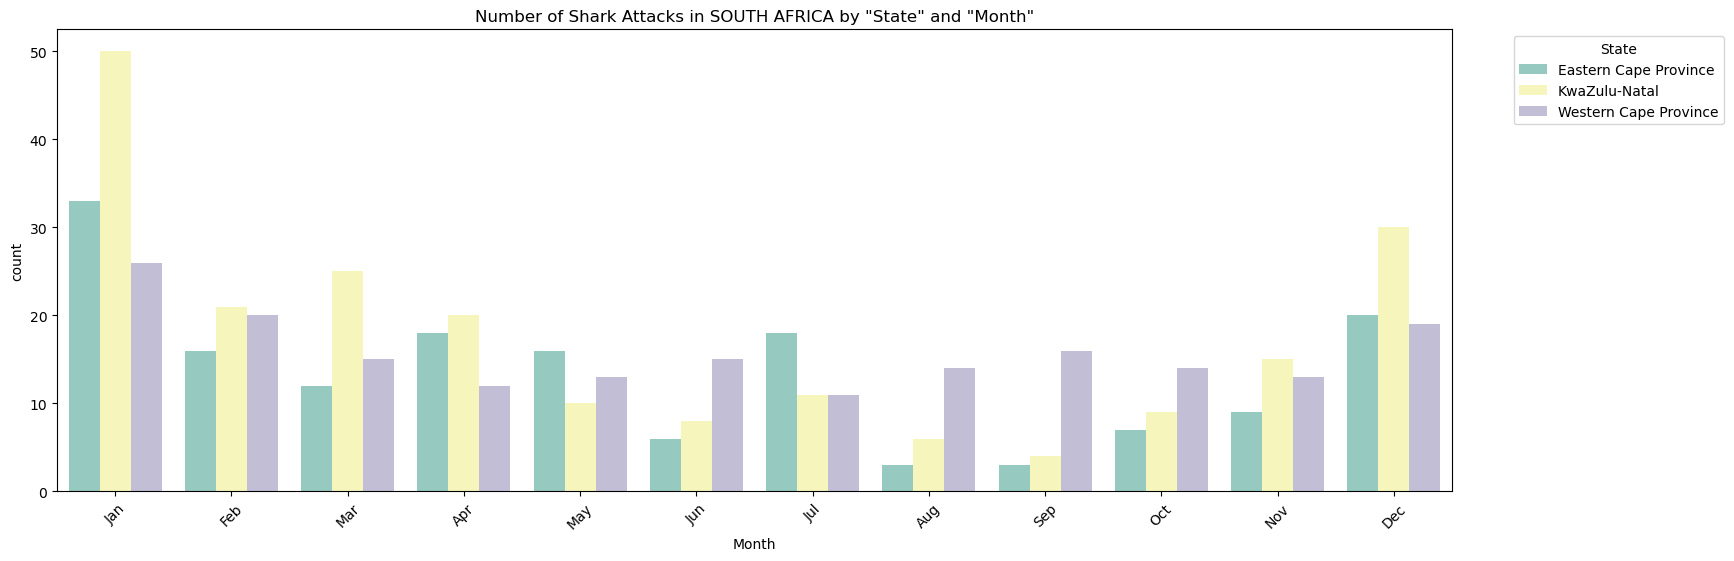

In [34]:
top_states_south_africa = south_africa_df['State'].value_counts().head(3).index
filtered_south_africa_df = south_africa_df[south_africa_df['State'].isin(top_states_south_africa)]

plt.figure(figsize=(18, 6))
sns.countplot(x='Month', hue='State', data=filtered_south_africa_df, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],palette='Set3')
plt.title('Number of Shark Attacks in SOUTH AFRICA by "State" and "Month"')
plt.xticks(rotation=45)
plt.legend(title='State', loc='upper right', bbox_to_anchor=(1.2, 1))

# Hypo 2: Activity and Human factor(Gender)

In [35]:
df3 = df.copy()

In [36]:
df3.drop(['Date','Year','Type','Country','State','Location','Name','Age','Injury','Time','Species'],axis=1,inplace=True)

In [37]:
df3.Activity = df3.Activity.astype(str)
#sorted(df.Activity.unique())

In [38]:
df3.loc[df3.Activity.str.contains("fishing", case=False), 'Activity'] = "Fishing"
df3.loc[df3.Activity.str.contains("surfing", case=False), 'Activity'] = "Surfing"
df3.loc[df3.Activity.str.contains("diving", case=False), 'Activity'] = "Diving"
df3.loc[df3.Activity.str.contains("swimming", case=False), 'Activity'] = "Swimming"
df3.loc[df3.Activity.str.contains("Air Disaster", case=False), 'Activity'] = "Air Disaster"
df3.loc[df3.Activity.str.contains("Sea Disaster", case=False), 'Activity'] = "Sea Disaster"
df3.loc[df3.Activity.str.contains("Bathing", case=False), 'Activity'] = "Bathing"
df3.loc[df3.Activity.str.contains("ski", case=False), 'Activity'] = "Surfing"
df3.loc[df3.Activity.str.contains("nan", case=False), 'Activity'] = None

In [39]:
df3.isnull().sum()

Activity    590
Sex         583
dtype: int64

In [40]:
df3.dropna(inplace=True)

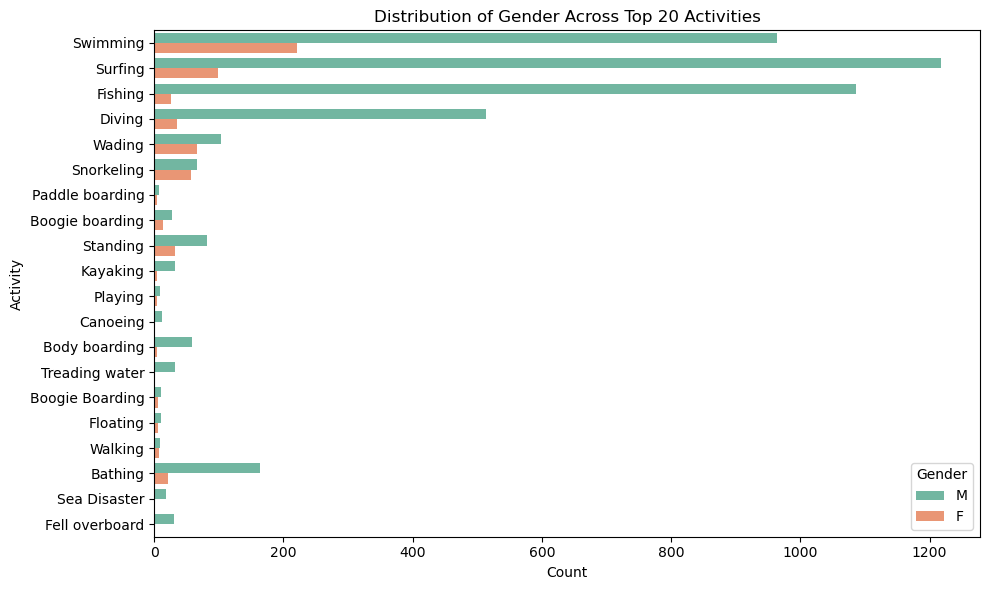

In [41]:
top_activities = df3['Activity'].value_counts().head(20).index

# Filter the DataFrame to include only the top 10 activities
df_top = df3[df3['Activity'].isin(top_activities)]

plt.figure(figsize=(10, 6))  
sns.countplot(y='Activity', hue='Sex', data=df_top, palette='Set2', hue_order=['M', 'F'])

plt.title('Distribution of Gender Across Top 20 Activities')
plt.xlabel('Count')
plt.ylabel('Activity')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()